<a href="https://colab.research.google.com/github/hadassah-olive/portfolio/blob/main/EXPLORATORY_DATA_ANALYSIS_TO_EXPLORE_THE_RELATIONSHIP_BETWEEN_BMI_AND_PCOS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXPLORATORY DATA ANALYSIS  TO EXPLORE THE RELATIONSHIP BETWEEN BMI AND PCOS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/pcos_dataset.csv")


In [4]:
df.head(5)

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [6]:
df.describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


In [7]:
print(df.isnull().sum())

Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64


In [8]:
print(df.duplicated().sum())

0


In [9]:
df.columns


Index(['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)',
       'Antral_Follicle_Count', 'PCOS_Diagnosis'],
      dtype='object')

In [10]:
df.columns


Index(['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)',
       'Antral_Follicle_Count', 'PCOS_Diagnosis'],
      dtype='object')

Text(0.5, 1.0, 'Age Distribution')

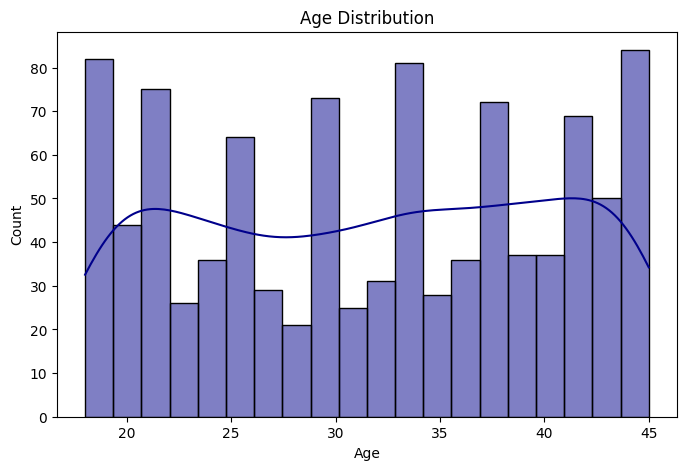

In [11]:
# Age distribution

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color="darkblue")
plt.xlabel("Age")
plt.title("Age Distribution")




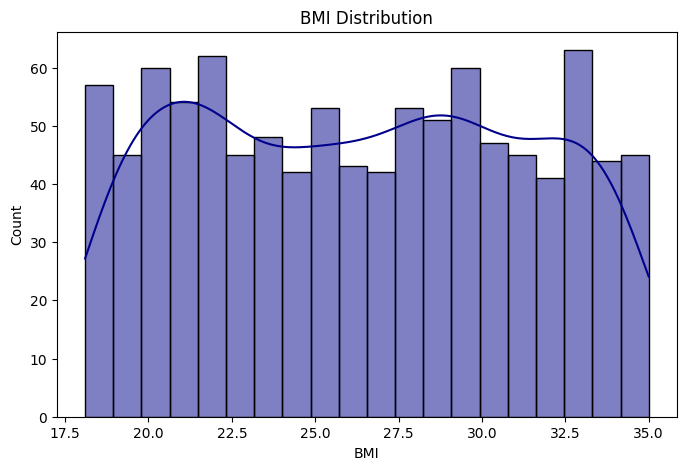

In [12]:
# BMI distribution

plt.figure(figsize=(8, 5))
sns.histplot(df['BMI'], bins=20, kde=True, color="darkblue")
plt.title("BMI Distribution")
plt.show()



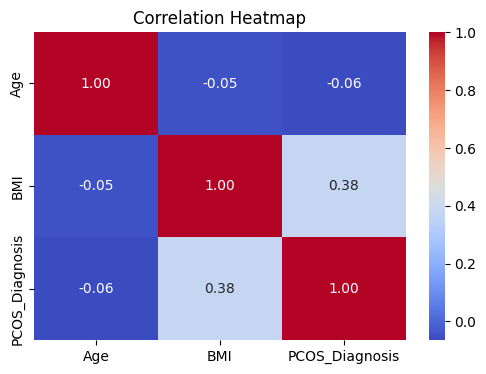

In [13]:
#Correlation matrix between age and BMI

# Calculate correlation matrix for numeric columns
corr = df[['Age', 'BMI', 'PCOS_Diagnosis']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Age has a very weak correlation with both BMI (-0.05) and PCOS Diagnosis (-0.06).
BMI shows a moderate positive correlation with PCOS Diagnosis (0.38).


In [14]:
# Define BMI bins and labels
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

# Create the BMI category column
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels)



In [15]:
# Group and count PCOS and non-PCOS cases
bmi_counts = df.groupby(['BMI_Category', 'PCOS_Diagnosis']).size().unstack(fill_value=0)
print(bmi_counts)


PCOS_Diagnosis    0    1
BMI_Category            
Underweight      33    0
Normal          384    0
Overweight      201   97
Obese           183  102


<ipython-input-15-040d0301138a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_counts = df.groupby(['BMI_Category', 'PCOS_Diagnosis']).size().unstack(fill_value=0)


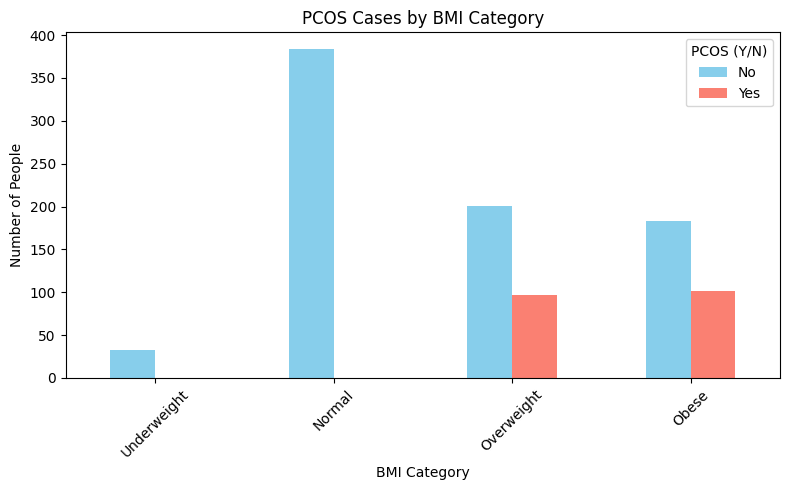

In [16]:
# Bar plot to compare PCOS and non-PCOS counts
bmi_counts.plot(kind='bar', figsize=(8, 5), color=['skyblue', 'salmon'])
plt.title('PCOS Cases by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Number of People')
plt.legend(title='PCOS (Y/N)', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The majority of individuals without PCOS are found in the normal BMI category. There is a notable presence of PCOS cases in both overweight and obese categories, indicating a link between higher BMI and PCOS prevalence.

In [17]:
pcos_rate = df.groupby('BMI_Category')['PCOS_Diagnosis'].mean() * 100
print(pcos_rate)


BMI_Category
Underweight     0.000000
Normal          0.000000
Overweight     32.550336
Obese          35.789474
Name: PCOS_Diagnosis, dtype: float64


<ipython-input-17-d87826355660>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pcos_rate = df.groupby('BMI_Category')['PCOS_Diagnosis'].mean() * 100


This data suggests a potential link between higher BMI categories and an increased incidence of PCOS.


CONCLUSION:
The exploratory data analysis suggests an association between higher BMI and PCOS diagnosis. Most PCOS diagnosed cases are concentrated in the overweight and obese BMI categories, indicating a potential link between excess body weight and PCOS prevalence.
Additionally, the relationship between Age and BMI appears to be weak or moderate, with no strong linear trend observed in the scatter plot.
These insights emaphasize the importance of weight management as it points towards PCOS risk, especially for individuals in higher BMI ranges.